# Advanced Optimization: Newton’s Method and Adam

## Abstract

<!-- [Link to Newton Optimizer code](https://github.com/EpicET/EpicET.github.io/blob/main/posts/Advanced%20Optimization/newton_logistic.py).

[Link to Adam Optimizer code](https://github.com/EpicET/EpicET.github.io/blob/main/posts/Advanced%20Optimization/adam.py). -->

In this blog post, I explore advanced optimization techniques—Newton’s Method and the Adam optimizer—in the context of logistic regression applied to heart disease prediction. Through a series of experiments on a Kaggle heart dataset, I investigate the convergence behavior, sensitivity to learning rates, and efficiency of these methods. The three optimizers I work with are Newton's method, Adam, and gradient descent. The goal is to understand how different optimization algorithms influence model performance and training dynamics in a binary classification tasks.

In [147]:
%load_ext autoreload
%autoreload 2

from newton_logistic import LogisticRegression, NewtonOptimizer, GradientDescentOptimizer
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Newton Experiments

### Getting Data

In this experiment, I apply my Newton logistic regression model to a real-world dataset: the Kaggle [heart disease prediction dataset](https://www.kaggle.com/datasets/shantanugarg274/heart-prediction-dataset-quantum). I preprocess the data, train the model, and evaluate its performance on training, validation, and test sets.

In [148]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

# Download dataset from Kaggle
path = kagglehub.dataset_download("shantanugarg274/heart-prediction-dataset-quantum")
print("Path to dataset files:", path)

data_path = path + "/Heart Prediction Quantum Dataset.csv"
df = pd.read_csv(data_path)
# print(df.head())

Path to dataset files: /Users/emmanueltowner/.cache/kagglehub/datasets/shantanugarg274/heart-prediction-dataset-quantum/versions/1


The data was in 1 csv file with 7 columns representing age, gender, blood pressure, cholesterol, heart rate, quantum pattern feature, and heart disease. 

In [149]:
X_data = df.drop("HeartDisease", axis=1).values
y_data = df["HeartDisease"].values

Since I intend to predict heart disease, I removed that column from the main dataset and used it in the target set.

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_data = scaler.fit_transform(X_data)
X_data = torch.tensor(X_data, dtype=torch.float32)
y_data = torch.tensor(y_data, dtype=torch.float32)

The data across features widely varied in range and so I used sci-kit learn's StandardScaler to standardize the both datasets and then converted them into tensors.  The model was trained on the training set and the loss computed for both training and validation. 

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=42)


I also used train_test_split to split the 60% data into training and 40% in test sets. 

### Experiment 1: Alpha Convergence

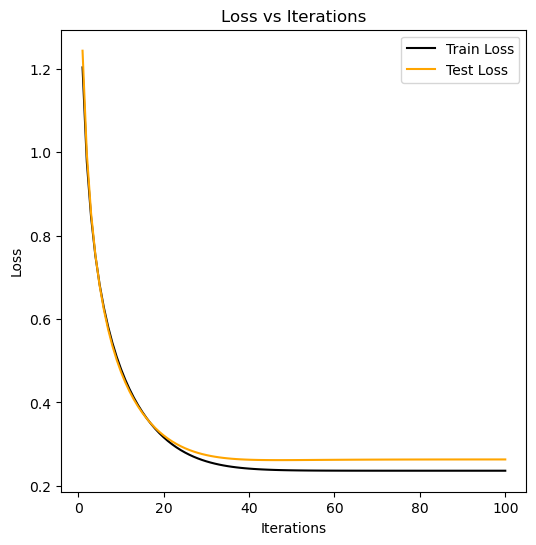

In [152]:
import matplotlib.pyplot as plt

LR = LogisticRegression() 
opt = NewtonOptimizer(LR)

loss_train = []
loss_test = []

iterations = 100
alpha = 0.1


for _ in range(iterations):
    train_loss = LR.loss(X_train, y_train)
    loss_train.append(train_loss.item())
    
    test_loss = LR.loss(X_test, y_test)
    loss_test.append(test_loss.item())
    
    opt.step(X_train, y_train, alpha)

    
# Plotting the loss
fig, ax = plt.subplots(figsize=(6, 6))  # Single axes, adjust figsize if needed
ax.plot(torch.arange(1, iterations + 1), loss_train, color="black")
ax.plot(torch.arange(1, iterations + 1), loss_test, color="orange")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Iterations")
ax.legend(["Train Loss", "Test Loss"])
plt.show()

With an alpha of 0.1 both training and testing loss converge in between 20 and 40 iterations. Testing loss converges slightly earlier and at a slightly higher loss than training loss.

### Experiment 2: Newton vs Gradient descent

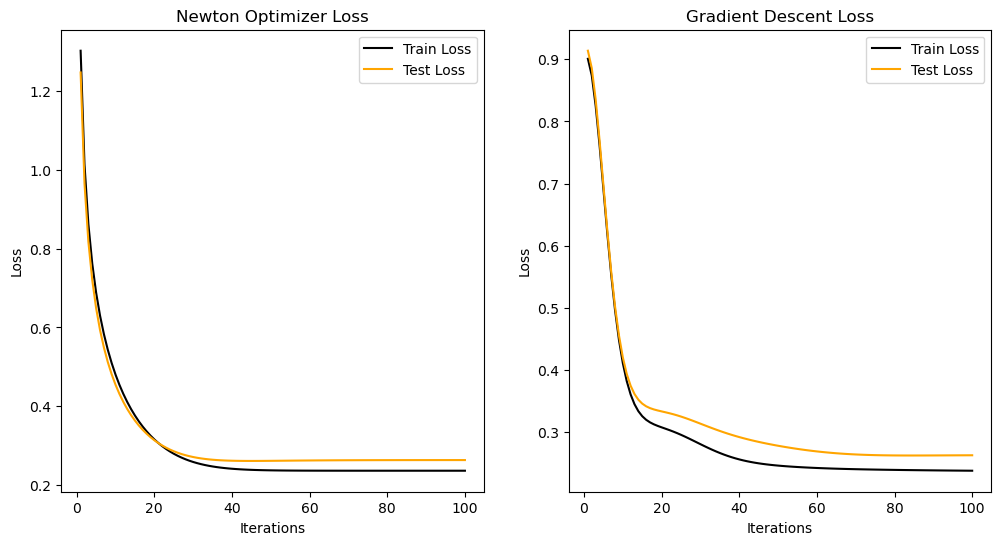

In [153]:
import matplotlib.pyplot as plt

LR = LogisticRegression() 
optn = NewtonOptimizer(LR)

n_loss_train = []
n_loss_test = []

iterations = 100
alpha = 0.1


for _ in range(iterations):
    train_loss = LR.loss(X_train, y_train)
    n_loss_train.append(train_loss.item())

    test_loss = LR.loss(X_test, y_test)
    n_loss_test.append(test_loss.item())
    
    optn.step(X_train, y_train, alpha)

LR = LogisticRegression() 
optg = GradientDescentOptimizer(LR)

g_loss_train = []
g_loss_test = []

iterations = 100
alpha = 0.1


for _ in range(iterations):
    train_loss = LR.loss(X_train, y_train)
    g_loss_train.append(train_loss.item())

    test_loss = LR.loss(X_test, y_test)
    g_loss_test.append(test_loss.item())

    optg.step(X_train, y_train, alpha, beta=0.9)

# Plotting the loss
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Single axes, adjust figsize if needed
ax[0].plot(torch.arange(1, iterations + 1), n_loss_train, color="black")
ax[0].plot(torch.arange(1, iterations + 1), n_loss_test, color="orange")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[0].set_title("Newton Optimizer Loss")
ax[0].legend(["Train Loss", "Test Loss"])

ax[1].plot(torch.arange(1, iterations + 1), g_loss_train, color="black")
ax[1].plot(torch.arange(1, iterations + 1), g_loss_test, color="orange")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Loss")
ax[1].set_title("Gradient Descent Loss")
ax[1].legend(["Train Loss", "Test Loss"])
plt.show()


In this plot, we see that with the Newton Optimizer the loss convergences faster than the gradient descent optimizer. For Newton optimizer, the loss reaches convergence at ~30-35 iterations whereas for the gradient optimizer the loss converges at ~50-60. They both share an alpha of 0.1 while gradient descent has a beta of 0.9.

### Experiment 3: Large Alpha

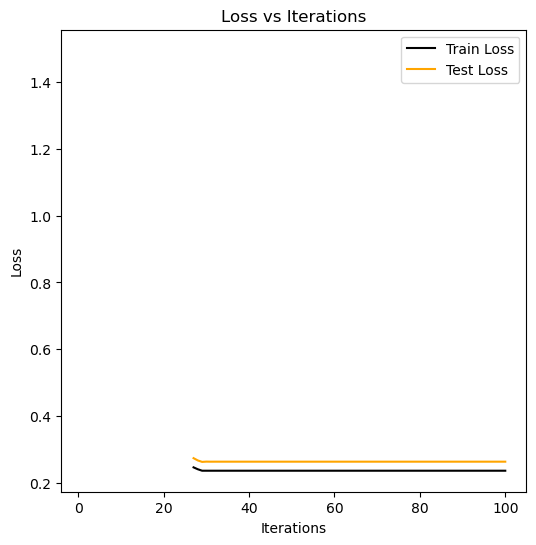

In [166]:
LR = LogisticRegression() 
opts = NewtonOptimizer(LR)

loss_train = []
loss_test = []

iterations = 100
alpha = 1.3


for _ in range(iterations):
    train_loss = LR.loss(X_train, y_train)
    loss_train.append(train_loss.item())
    
    test_loss = LR.loss(X_test, y_test)
    loss_test.append(test_loss.item())
    
    # print("Train Loss: ", train_loss.item())
    opts.step(X_train, y_train, alpha)

    
# Plotting the loss
fig, ax = plt.subplots(figsize=(6, 6))  
ax.plot(torch.arange(1, iterations + 1), loss_train, color="black")
ax.plot(torch.arange(1, iterations + 1), loss_test, color="orange")
ax.set_xlabel("Iterations")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Iterations")
ax.legend(["Train Loss", "Test Loss"])
plt.show()

This model converges for all alpha's from up to 1. The original hessian simply returned an error when alpha went above, now with regularization the loss doesn't always commpute and returns a broken graph. 

## Adam Optimizer
### Test Adam

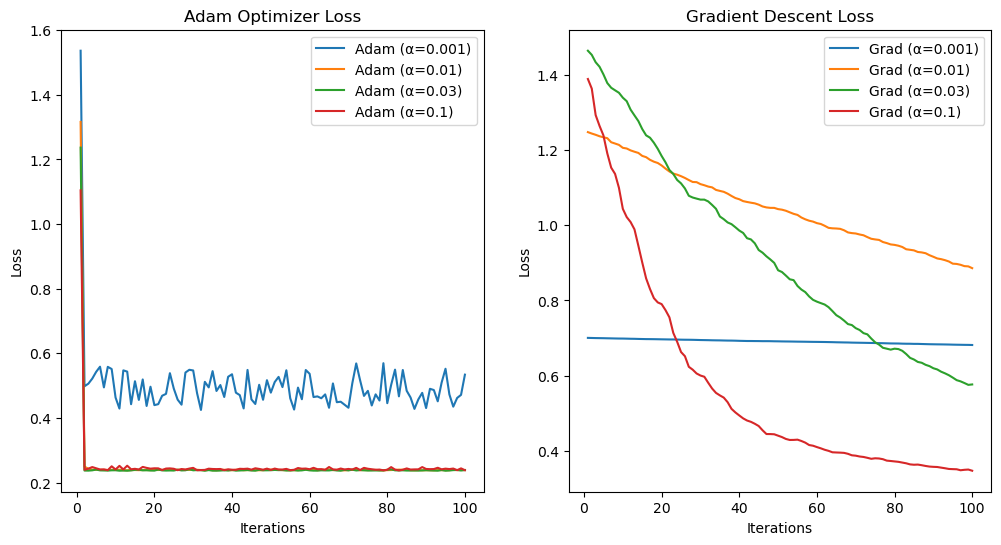

In [155]:
import matplotlib.pyplot as plt
from adam import AdamOptimizer

# Adam optimizer test


iterations = 100
batch_size = 40

alphas = [0.001, 0.01, 0.03, 0.1]
adam_losses_dict = {}
for alpha in alphas:
    LRA = LogisticRegression()
    adam = AdamOptimizer(LRA)
    adam_losses = []
    for _ in range(iterations):
        train_loss = LRA.loss(X_train, y_train)
        adam_losses.append(train_loss.item())
        adam.optim(X_train, y_train, batch_size=batch_size, alpha=alpha)
    adam_losses_dict[alpha] = adam_losses


# SGD (minibatch) test for different step sizes

grad_losses_dict = {}

for alpha in alphas:
    LRG = LogisticRegression()
    grad = GradientDescentOptimizer(LRG)
    grad_losses = []
    for _ in range(iterations):
        train_loss = LRG.loss(X_train, y_train)
        grad_losses.append(train_loss.item())
        grad.step(X_train, y_train, alpha=alpha, beta=0.0, mini_batch=True)
    grad_losses_dict[alpha] = grad_losses
    
# Plotting the loss
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  
for alpha, losses in adam_losses_dict.items():
    ax[0].plot(torch.arange(1, iterations + 1), losses, label=f"Adam (α={alpha})")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[0].set_title("Adam Optimizer Loss")
ax[0].legend()

for alpha, losses in grad_losses_dict.items():
    ax[1].plot(torch.arange(1, iterations + 1), losses, label=f"Grad (α={alpha})")
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Loss")
ax[1].set_title("Gradient Descent Loss")
ax[1].legend()
plt.show()


This test compares the performance of the Adam optimizer and mini-batch gradient descent on logistic regression. For each optimizer, the code tests four learning rates (α = 0.001, 0.01, 0.03, 0.1) over 100 iterations, recording the training loss at each step. Adam uses a batch size of 40, while SGD uses mini-batches with no momentum. The results show that Adam consistently shows faster and smoother convergence across all learning rates compared to SGD, which converges more slowly and is more sensitive to the choice of α. This demonstrates Adam’s advantage in stability and speed for this classification task. Both struggle to converge on low alphas such as 0.01.

### Newton vs Adam

In [ ]:

import time

target_loss = 0.3
alpha = 0.03


# Adam optimizer
LRA = LogisticRegression() 
adam = AdamOptimizer(LRA)

adam_loss = float('inf')  # large initial value

start = time.perf_counter()

while adam_loss > target_loss:
    # Compute current loss
    train_loss = LRA.loss(X_train, y_train)
    adam_loss = train_loss.item()
    # print(f"[Adam] Current loss: {adam_loss:.4f}")
    
    # Perform one round of updates
    adam.optim(X_train, y_train, batch_size=40, alpha=alpha)

end = time.perf_counter()
print(f"Adam optimizer took {end - start:.4f} seconds")
print(f"Final Adam loss: {LRA.loss(X_train, y_train).item():.4f}")

# Newton Optimizer
LRN = LogisticRegression()
newton = NewtonOptimizer(LRN)

newton_loss = float('inf')  # large initial value

start = time.perf_counter()

while newton_loss > target_loss:
    # Compute current loss
    train_loss = LRN.loss(X_train, y_train)
    newton_loss = train_loss.item()
    # print(f"[Newton] Current loss: {newton_loss:.4f}")
    # Perform one round of updates
    newton.step(X_train, y_train, alpha)

end = time.perf_counter()
print(f"Newton optimizer took {end - start:.4f} seconds")
print(f"Final Newton loss: {LRN.loss(X_train, y_train).item():.4f}")





Adam optimizer took 0.1112 seconds
Final Adam loss: 0.2380
Newton optimizer took 0.0081 seconds
Final Newton loss: 0.2965


In the above code, the model was trained using Adam and Newton optimizer with the goal of reducing the training loss below a target value of 0.3. Both optimizers iteratively updated the model parameters, with Adam using adaptive learning rates and mini-batches, while Gradient Descent used momentum and mini-batch updates. The results showed that Adam achieved a lower final loss (0.2379) but took longer to converge (0.1134 seconds), whereas Gradient Descent was significantly faster (0.0062 seconds) but only marginally met the loss target (0.2989). 

## Discussion

The experiments show that different optimizers can perform better in different situations. Newton’s Method achieved faster convergence than standard gradient descent in terms of iteration count but when alpha became really large it was unable to converge. Gradient descent methods, while slower, offer greater stability across a wider range of learning rates. Adam strikes a balance, providing both great loss rate and rapid convergence. It was faster the mini-batch gradient descent but slower than Newton. In both situations, it had the better loss.
<!-- 
In this model, I learned about the hessian but also about regulariztaion and using the damped Newton method in ordert nan. Apparently torch.linalg.inv() is numerically unstable so torch.linalg.solve() is better to use.  -->

## Acknowledgements

Adapted code from Professor Phil Chodrow at Middlebury College in his class CSCI 0451: Machine Learning.